# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                     PI                        \
var                                       SS DF      F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD        0.497  1  0.906 0.342 0.005   
                             age       0.127  1  0.231 0.631 0.001   
                             Kiel      2.088  1  3.808 0.052 0.020   
                             Magdeburg 4.481  1  8.175 0.005 0.041   
                             Sweden    7.116  1 12.981 0.000 0.064   
...                                      ... ..    ...   ...   ...   
S4R3U6                       AD        0.256  1  0.253 0.615 0.001   
                             age       1.712  1  1.690 0.195 0.009   
                             Kiel      0.004  1  0.004 0.947 0.000   
                             Magdeburg 3.925  1  3.874 0.050 0.020   
                             Sweden    7.789  1  7.689 0.006 0.039   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.466  0.504    False  
                             age               0.200  0.758    False  
                             Kiel              1.280  0.126    False  
                             Magdeburg         2.326  0.018     True  
                             Sweden            3.397  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.211  0.746    False  
                             age               0.710  0.340    False  
                             Kiel              0.024  0.969    False  
                             Magdeburg         1.297  0.122    False  
                             Sweden            2.214  0.022     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.941  1  7.132 0.008 0.036   
                             age        0.011  1  0.084 0.772 0.000   
                             Kiel       0.230  1  1.742 0.188 0.009   
                             Magdeburg  0.361  1  2.739 0.100 0.014   
                             Sweden     1.506  1 11.412 0.001 0.056   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.238  1  4.524 0.035 0.023   
                             age        0.919  1  1.858 0.174 0.010   
                             Kiel       2.657  1  5.371 0.022 0.027   
                             Magdeburg  2.154  1  4.354 0.038 0.022   
                             Sweden    16.660  1 33.673 0.000 0.150   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.085  0.023     True  
                             age               0.112  0.846    False  
                             Kiel              0.725  0.301    False  
                             Magdeburg         1.002  0.182    False  
                             Sweden            3.053  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.460  0.077    False  
                             age               0.758  0.283    False  
                             Kiel              1.667  0.052    False  
                             Magdeburg         1.417  0.083    False  
                             Sweden            7.573  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.008         2.085  0.023     True   
                             Kiel      0.188         0.725  0.301    False   
                             Magdeburg 0.100         1.002  0.182    False   
                             Sweden    0.001         3.053  0.003     True   
                             age       0.772         0.112  0.846    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.035         1.460  0.077    False   
                             Kiel      0.022         1.667  0.052    False   
                             Magdeburg 0.038         1.417  0.083    False   
                             Sweden    0.000         7.573  0.000     True   
                             age       0.174         0.758  0.283    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.342         0.466  0.504    False  
                             Kiel      0.052         1.280  0.126    False  
                             Magdeburg 0.005         2.326  0.018     True  
                             Sweden    0.000         3.397  0.002     True  
                             age       0.631         0.200  0.758    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.615         0.211  0.746    False  
                             Kiel      0.947         0.024  0.969    False  
                             Magdeburg 0.050         1.297  0.122    False  
                             Sweden    0.006         2.214  0.022     True  
                             age       0.195         0.710  0.340    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.227         3.234     0.282     0.260         2.485     0.336
std       0.295         6.090     0.322     0.303         5.330     0.330
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.399     0.002     0.004         0.340     0.015
50%       0.063         1.204     0.125     0.121         0.918     0.241
75%       0.399         3.241     0.532     0.457         2.419     0.609
max       1.000        86.552     1.000     1.000       146.334     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49774/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.008         2.085   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.471   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.143         0.846   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.251         0.600   
A0A075B6H7                                         AD     0.001         2.919   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.199         0.702   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.566         0.247   
S4R3U6                                             AD     0.035         1.460   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.023     True   
A0A024R0T9;K7ER74;P02655                           AD      0.076    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.242    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.377    False   
A0A075B6H7                                         AD      0.004     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.284    False   
Q9Y6X5                                             AD      0.314    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.158    False   
Q9Y6Y9                                             AD      0.684    False   
S4R3U6                                             AD      0.077    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.342         0.466   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.366   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.067         1.171   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.485         0.314   
A0A075B6H7                                         AD     0.061         1.214   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.042         1.376   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.499         0.302   
S4R3U6                                             AD     0.615         0.211   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.504    False  
A0A024R0T9;K7ER74;P02655                           AD      0.108    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.153    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.635    False  
A0A075B6H7                                         AD      0.142    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.242         1.584     0.303     0.250         1.402     0.333
std       0.296         1.845     0.319     0.286         1.620     0.313
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.007         0.372     0.020     0.012         0.363     0.038
50%       0.093         1.030     0.173     0.124         0.906     0.246
75%       0.424         2.151     0.557     0.434         1.931     0.590
max       1.000        19.399     1.000     0.998        22.287     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,946,1030


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.008         2.085  0.023   
A0A024R0T9;K7ER74;P02655                           0.034         1.471  0.076   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.143         0.846  0.242   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.251         0.600  0.377   
A0A075B6H7                                         0.001         2.919  0.004   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.284   
Q9Y6X5                                             0.199         0.702  0.314   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.158   
Q9Y6Y9                                             0.566         0.247  0.684   
S4R3U6                                             0.035         1.460  0.077   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.342   
A0A024R0T9;K7ER74;P02655                              False 0.043   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.067   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.485   
A0A075B6H7                                             True 0.061   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.042   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.499   
S4R3U6                                                False 0.615   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.466  0.504   
A0A024R0T9;K7ER74;P02655                                   1.366  0.108   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.171  0.153   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.314  0.635   
A0A075B6H7                                                 1.214  0.142   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     1.376  0.106   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.181   
Q9Y6Y9                                                     0.302  0.649   
S4R3U6                                                     0.211  0.746   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    886
CF (yes) - PI (yes)   331
CF (yes) - PI (no)    144
CF (no)  - PI (yes)    60
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49774/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.008         2.085  0.023     True 0.342   
A0A075B6H7                   0.001         2.919  0.004     True 0.061   
A0A075B6I0                   0.001         3.107  0.003     True 0.026   
A0A075B6Q5                   0.011         1.963  0.029     True 0.753   
A0A075B6R2                   0.001         3.045  0.003     True 0.481   
...                            ...           ...    ...      ...   ...   
Q9ULZ9                       0.025         1.600  0.059    False 0.001   
Q9UMX0;Q9UMX0-2;Q9UMX0-4     0.017         1.767  0.043     True 0.025   
Q9UNW1                       0.987         0.006  0.992    False 0.011   
Q9UP79                       0.000         3.592  0.001     True 0.435   
Q9Y6C2                       0.010         1.998  0.027     True 0.594   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.466  0.504    False       186  
A0A075B6H7                           1.214  0.142    False        91  
A0A075B6I0                           1.582  0.074    False       194  
A0A075B6Q5                           0.123  0.847    False       104  
A0A075B6R2                           0.318  0.632    False       164  
...                                    ...    ...      ...       ...  
Q9ULZ9                               2.945  0.005     True       171  
Q9UMX0;Q9UMX0-2;Q9UMX0-4             1.609  0.070    False        57  
Q9UNW1                               1.972  0.035     True       171  
Q9UP79                               0.361  0.591    False       135  
Q9Y6C2                               0.226  0.729    False       119  

[204 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.023,0.504,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.076,0.108,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.242,0.153,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.377,0.635,196,CF (no) - PI (no)
A0A075B6H7,0.004,0.142,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.284,0.316,197,CF (no) - PI (no)
Q9Y6X5,0.314,0.106,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.158,0.181,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q6P4E1;Q6P4E1-4;Q6P4E1-5,0.995,0.035,178,CF (no) - PI (yes),0.960
Q9UNW1,0.992,0.035,171,CF (no) - PI (yes),0.957
A0A087X152;D6RE16;E0CX15;O95185;O95185-2,0.987,0.035,176,CF (no) - PI (yes),0.951
Q9BX67,0.975,0.033,161,CF (no) - PI (yes),0.942
P17931,0.008,0.940,174,CF (yes) - PI (no),0.933
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.047,0.057,197,CF (yes) - PI (no),0.010
Q9NX62,0.046,0.055,197,CF (yes) - PI (no),0.010
P00740;P00740-2,0.043,0.053,197,CF (yes) - PI (no),0.009


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


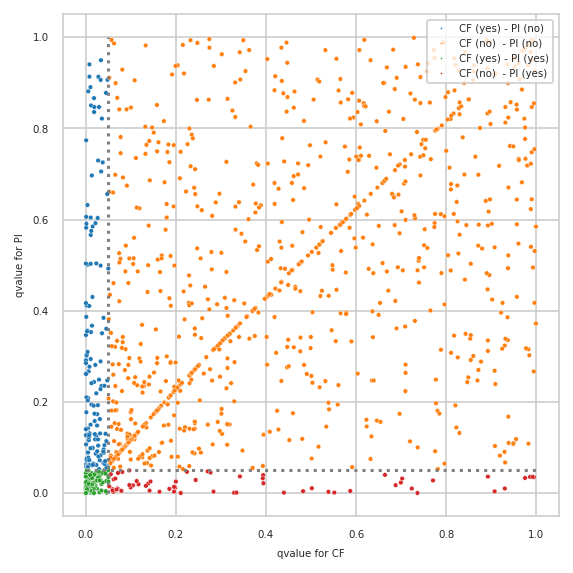

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


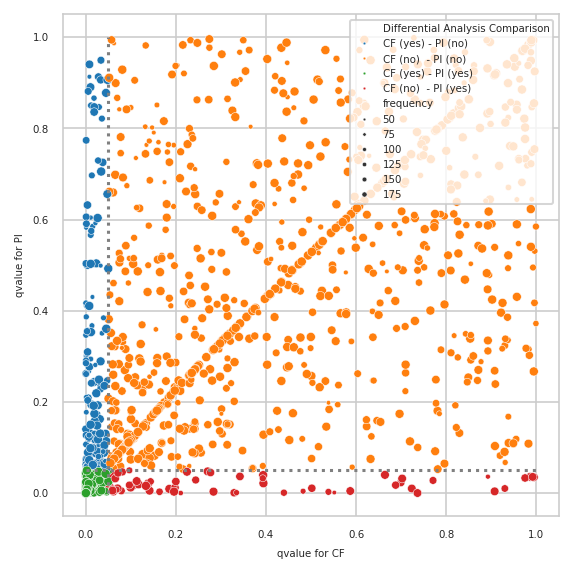

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APP,ENSP00000284981,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
MAPT,ENSP00000340820,4.800
...,...,...
TSPYL2,ENSP00000364591,0.681
MRPL1,ENSP00000315017,0.681
AASS,ENSP00000403768,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out